<a href="https://colab.research.google.com/github/not-Bartek/Linear-regression/blob/main/Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

Y = wX + b

Y -> Dependent Variable

X -> Independent Variable

w -> weight

b -> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w -a * da/dw

b = w - a * da/db

**Learning Rate:**
Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

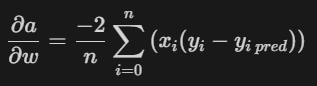
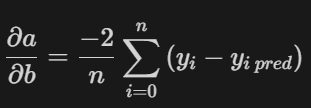

In [130]:
#importing numpy library
import numpy as np

**Linear Regression**

In [131]:
class Linear_Regression():

#initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    #number of training examples & numbers of features
    self.m, self.n = X.shape #number of rows and columns

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m
    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self, X):
    return X.dot(self.w) + self.b

Using Linear Regression model for Prediction

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Collection and analysis

In [133]:
salary_data = pd.read_csv('salary_data.csv')

In [134]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [135]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and the target

In [136]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [137]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting data into test and train

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

Training the Linear Regression model

In [152]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [153]:
model.fit(X_train, Y_train)

In [154]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Salary = 9514(x) + 23697

In [155]:
test_data_prediction = model.predict(X_test)

In [156]:
test_data_prediction

array([ 36066.12780588,  34163.24760607,  66512.21100279,  58900.69020357,
        91249.65360029,  80783.81250135, 101715.49469922,  52240.60950424,
        42726.20850521,  88395.33330058])

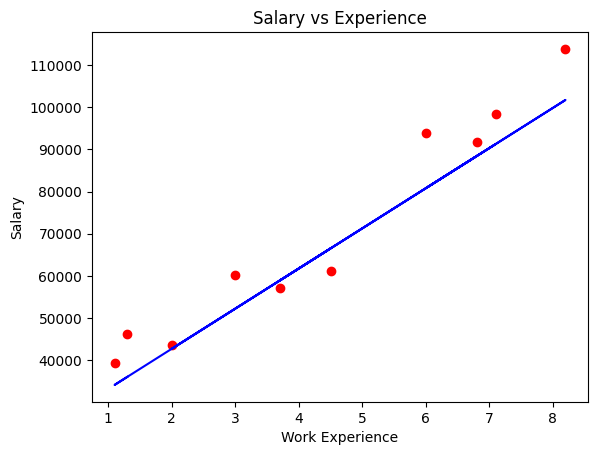

In [157]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()